In [1]:
from __future__ import annotations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import urllib.request as url
import pytz
import os
from IPython.display import display as ipdisplay

import sys
sys.path.append('..')
from data_processing.data_import import Elmy_import, test_equal
from visualization.visualize import visualize_nan
from interpolation.low_rank_interpolation import low_rank_interpolation
from interpolation.auto_regressive_interpolation import ar_interpolation_multiple_nan_seq, ar_interpolation

# Import the data

In [2]:
X_train = Elmy_import('../data/processed/X_train.csv', with_date=False)
y_train_raw = Elmy_import('../data/raw/y_train_raw.csv', target=True)
X_test = Elmy_import('../data/processed/X_test.csv', with_date=False)
X_train_raw = Elmy_import('../data/raw/X_train_raw.csv', with_date=False)
X_test_raw = Elmy_import('../data/raw/X_test_raw.csv', with_date=False)

# ``NaN`` values

## Training data

In [3]:
# number of NaN per column
ipdisplay(pd.concat([X_train.isna().sum(), X_train_raw.isna().sum(), X_test.isna().sum(), X_test_raw.isna().sum()], axis=1, keys=['X_train', 'X_train_raw', 'X_test', 'X_test_raw']))

,X_train,X_train_raw,X_test,X_test_raw
predicted_spot_price,8759.0,8759.0,1536.0,1536.0
Date (UTC),0.0,NaN,0.0,NaN
Date,0.0,NaN,0.0,NaN
TMin (°C),0.0,NaN,0.0,NaN
TMax (°C),0.0,NaN,0.0,NaN
Pic journalier consommation (MW),0.0,NaN,0.0,NaN
Température référence (°C),0.0,NaN,0.0,NaN
Solde min (MW),0.0,NaN,0.0,NaN
Solde max (MW),0.0,NaN,0.0,NaN
Load_Actual_Ge,26.0,NaN,2.0,NaN


<Axes: xlabel='DELIVERY_START'>

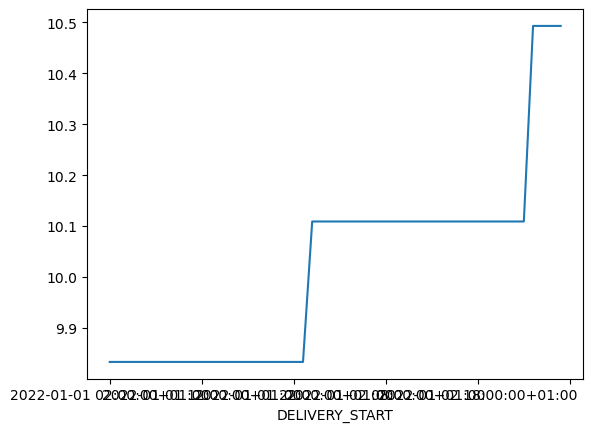

In [7]:
X_train['TMoy (°C)'][:50].plot()

In [ ]:
visualize_nan()